## Student N.o : 91279 Excercise : Linear Regression 

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

### 1. Read housing.csv

In [2]:
#Read housing.csv data
data = pd.read_csv('Housing.csv')

In [3]:
# Correlation plot of the features in the data set
corr=data.corr()

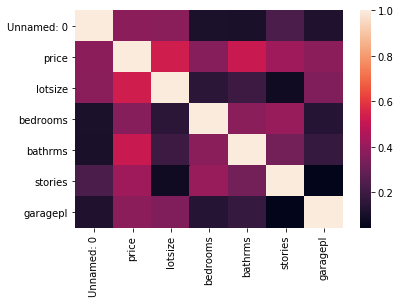

In [4]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

### 2.a) Number of features in the data b.) Number of instances

In [5]:
data.shape

(546, 13)

### 2.a) Data type of the features

In [6]:
data.dtypes

Unnamed: 0      int64
price         float64
lotsize         int64
bedrooms        int64
bathrms         int64
stories         int64
driveway       object
recroom        object
fullbase       object
gashw          object
airco          object
garagepl        int64
prefarea       object
dtype: object

In [7]:
#Exploring the data
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [8]:
data.tail()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no
545,546,105000.0,6000,3,1,2,yes,no,no,no,yes,1,no


In [9]:
data=data.drop(columns=["Unnamed: 0"])

In [10]:
data.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [11]:
data.shape

(546, 12)

In [12]:
data.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
# Total missing values for each feature:
data.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [14]:
#Check for any null values in a specified feature
data['price'].isnull().values.any()

False

In [15]:
data['lotsize'].isnull().values.any()

False

In [16]:
#using pandas sample method to split the data
train = data.sample(frac=0.7,random_state=200)

In [17]:
len(train)

382

In [18]:
test = data.drop(train.index)

In [19]:
len(test)

164

In [20]:
train.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
386,83900.0,11460,3,1,3,yes,no,no,no,no,2,yes
500,67900.0,6440,2,1,1,yes,no,no,no,yes,3,no
543,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
314,76900.0,6450,3,2,1,yes,yes,yes,yes,no,0,no
225,70800.0,2800,3,2,2,no,no,yes,no,yes,1,no


In [21]:
#The independent variable is the lot size
x_train = train['lotsize']

In [22]:
x_train.head(5)

386    11460
500     6440
543     6000
314     6450
225     2800
Name: lotsize, dtype: int64

In [23]:
# the dependent variable is the price, we're trying to explain the price
y_train = train['price']

In [24]:
y_train.head()

386     83900.0
500     67900.0
543    103000.0
314     76900.0
225     70800.0
Name: price, dtype: float64

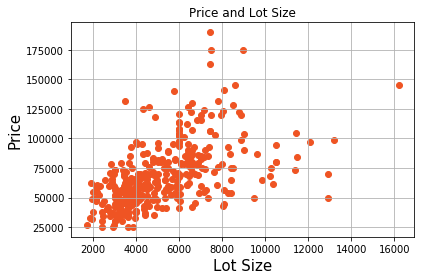

In [25]:
#scatter plot of lot size vs price
fig, ax = plt.subplots()
ax.scatter(x_train,y_train,c='#ef5423',label='Scatter Plot')
ax.set_xlabel('Lot Size', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Price and Lot Size')

ax.grid(True)
fig.tight_layout()

plt.show()

In [26]:
#checking for the correlation between x and y
data['lotsize'].corr(data['price'])

0.535795672432184

In [27]:
np.mean(x_train)

5095.759162303665

In [28]:
np.mean(y_train)

67390.03141361257

In [29]:
# A class to contain the parameters of the model, oop in python :), effects of java
class Model:
    def __init__(self,b0,b1):
        self.b0 = b0
        self.b1 = b1

In [30]:
#Regression function
def fitRegression(x,y):
    m = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    numer = 0
    denom = 0
    for i in range(m):
        numer += (x[i] - mean_x) * (y[i] - mean_y)
        denom += (x[i]-mean_x)**2
        b1 = numer/denom
        b0 = mean_y - b1*mean_x
    return Model(b0= b0, b1= b1)

In [31]:
model = fitRegression(x_train.values,y_train.values)

In [32]:
model.b0

32958.32162657589

In [33]:
model.b1

6.756934284051008

### y = 32958.32162657589 + 6.756934284051008x

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
X = data['lotsize'].values

In [36]:
Y = data['price'].values

In [37]:
#Using sklearns train_test_split to split the data
# Function is used to split our data to a training and test data, it takes in the arrays containing the data to be split
# The test_size is a value between 0 and 1, refers to the proportion of test size to be split
# The random state is a random number used for seeding
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [38]:
X_train

array([ 6800,  8050,  4410,  3480,  3450,  3934,  4950,  6000,  6000,
        4160,  3760,  2160,  4995,  3000,  3300,  4960,  3290,  2850,
        6650,  3600,  2970,  4120,  3960,  7475,  5076,  9960,  3120,
        4500,  3000,  2700,  3800,  4160,  3990,  5300,  3000,  5170,
        2747,  7680,  4300,  6420,  6540,  9800,  3180,  3630,  9000,
        6615,  4500,  3180,  5136,  8400,  3500,  3264,  6400,  8520,
        2650, 11175,  6000,  4500,  3185,  2684,  7424,  8875,  3600,
        8250,  3460,  3240,  3750,  6450,  4500,  7420,  3600,  6500,
        4320,  4600,  3960,  6900,  5680,  3500,  8250,  3210,  4000,
        6000,  6840,  5828,  8100,  6360,  2610,  4000,  6000,  7000,
        3520,  5400,  4032,  3750,  4600,  6350,  2400,  4500,  5450,
        4000,  3640,  9000,  3450,  5640,  6000,  5400,  6100,  3930,
        6500,  2175,  5500,  4500, 10269,  6000,  4840, 10240,  8250,
        4500,  3000,  6240,  8250,  4320,  4040,  7231,  4400,  3510,
        3480,  3480,

In [39]:
y_train

array([ 86000., 123500.,  60000.,  42000.,  48500.,  38000.,  62600.,
       120900., 102000.,  66000.,  93000.,  44000.,  69900.,  70000.,
        40500.,  48000.,  56000.,  52000.,  60500.,  54000.,  70000.,
        48000.,  40000., 120000.,  43000., 175000.,  50000.,  44900.,
        36000.,  42000.,  43500.,  69000.,  50000.,  55000.,  73000.,
        67000.,  60000., 103000., 106500.,  87500.,  75000.,  75000.,
        55500.,  57500., 103500.,  87000.,  57250.,  33000.,  80000.,
        75000.,  44500.,  34000.,  90000.,  75000.,  40000., 100000.,
        67000.,  74500.,  48000.,  46000.,  50000., 120000.,  58550.,
        64000.,  57500.,  35000.,  63500.,  62000.,  44000., 163000.,
        37000.,  84000.,  58000.,  75500.,  57000.,  86000.,  66000.,
       132000.,  93000.,  35000.,  64000., 110000., 116000.,  83000.,
       141000.,  80000.,  49000.,  38000.,  89500.,  60000.,  60000.,
        57500.,  61700.,  43000.,  60000.,  88500.,  30000.,  46500.,
        52900.,  390

In [40]:
regression_model = LinearRegression()

In [41]:
X_train = X_train.reshape(-1,1)

In [42]:
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
regression_model.coef_

array([6.8453667])

In [44]:
regression_model.intercept_

33220.20413120212

### Model Learned
#### y = 33220.20413120212 + 6.8453667x

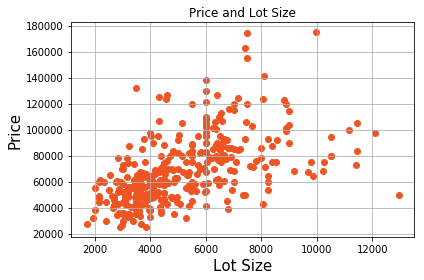

In [45]:
#Scatte plot of th i.v and d.v learned
fig, ax = plt.subplots()
ax.scatter(X_train,y_train,c='#ef5423',label='Scatter Plot')
ax.set_xlabel('Lot Size', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Price and Lot Size')

ax.grid(True)
fig.tight_layout()

plt.show()

In [46]:
X_test.shape

(181,)

In [47]:
x_test = X_test.reshape(-1,1)

In [48]:
y_pred = regression_model.predict(x_test)

In [49]:
y_test.shape

(181,)

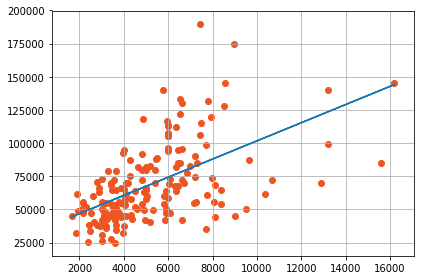

In [83]:
#Regression Line plot
plt.plot(x_test,y_pred,label='Regression Line')
plt.scatter(x_test,y_test,c='#ef5423',label='Scatter Plot')
plt.grid(True)
plt.tight_layout()

#### Calculating SSE (Sum of Squared Errors)

In [51]:
y_pred.shape

(181,)

In [52]:
sse = np.sum((y_test-y_pred)**2)
print(sse)

106732484177.79666


In [53]:
# Mean Squared Error
mse = sse / len(y_pred)
print(mse)+

589682233.0265009


In [54]:
res = y_test - y_pred

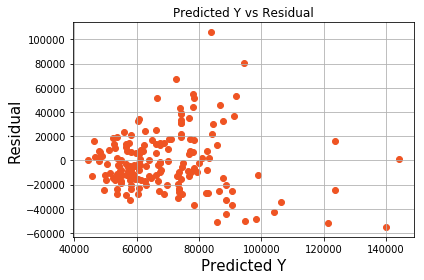

In [55]:
# Predicted Y vs Residual
fig, ax = plt.subplots()
ax.scatter(y_pred,res,c='#ef5423',label='Scatter Plot')
ax.set_xlabel('Predicted Y', fontsize=15)
ax.set_ylabel('Residual', fontsize=15)
ax.set_title('Predicted Y vs Residual')

ax.grid(True)
fig.tight_layout()

plt.show()

In [56]:
r2_score(y_test,y_pred)

0.28035761654752

# Multiple Linear Regression Tutorial

In [57]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [58]:
boston = load_boston()

In [59]:
type(boston)


sklearn.utils.Bunch

In [60]:
print(boston.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [61]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [62]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [63]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [64]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [65]:
boston_df = pd.DataFrame(columns=boston.feature_names,data=boston.data)

In [66]:
boston_df.shape

(506, 13)

In [67]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [68]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [69]:
boston_X = boston_df.values

In [70]:
boston_y = boston.target

In [71]:
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(boston_X, boston_y, test_size=0.33, random_state=42)

In [72]:
boston_X_train.shape

(339, 13)

In [73]:
multiple_regression_model = LinearRegression()

In [74]:
multiple_regression_model.fit(boston_X_train,boston_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Leanred

In [75]:
multiple_regression_model.intercept_

33.3880621893243

In [76]:
multiple_regression_model.coef_

array([-1.28060398e-01,  3.77955693e-02,  5.86107797e-02,  3.24007007e+00,
       -1.62222676e+01,  3.89352244e+00, -1.27879944e-02, -1.42326864e+00,
        2.34513082e-01, -8.20261127e-03, -9.29950535e-01,  1.19151410e-02,
       -5.48489997e-01])

In [77]:
boston_y_pred = multiple_regression_model.predict(boston_X_test)

### MSE

In [78]:
mse = mean_squared_error(boston_y_test,boston_y_pred)

In [79]:
print(mse)

20.74714336030893


### SSE

In [80]:
sse = mse * len(boston_y_test)

In [81]:
sse

3464.772941171591

### Coefficient of determination

In [82]:
r2_score(boston_y_test,boston_y_pred)

0.7258515818230051